In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

In [5]:
#load api key from environment
api_key = os.getenv('yt_api_key')

#list of channels for analysis
channel_ids = ['UCyzOLJaMNi_rxh7mwqOiopQ', # Kozlov Club Moscow
               'UCSVMjXhyaI8RphdZfNqvOfw', # JFC St Petersburg 
               'UC5qqgQdY6dXriJirFuhAyrw', # Esse Moscow
               'UCk378HOfjP2PJ5j499Axgfw', # Igor Butman Jazz Club Moscow
               'UC89e26zGwx0XB_83NE0XMGA' # EverJazz club Ekaterinburg
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Get channel stats

In [6]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [7]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,EverJazz club,446,121227,513,UU89e26zGwx0XB_83NE0XMGA
1,Esse Jazz Club,2600,585434,566,UU5qqgQdY6dXriJirFuhAyrw
2,Kozlov Club,11100,2438912,3447,UUyzOLJaMNi_rxh7mwqOiopQ
3,Джаз-клуб Игоря Бутмана,2540,335819,926,UUk378HOfjP2PJ5j499Axgfw
4,JFC Jazz Club,425,15402,398,UUSVMjXhyaI8RphdZfNqvOfw


In [8]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

<Axes: xlabel='Channel_name', ylabel='Total_videos'>

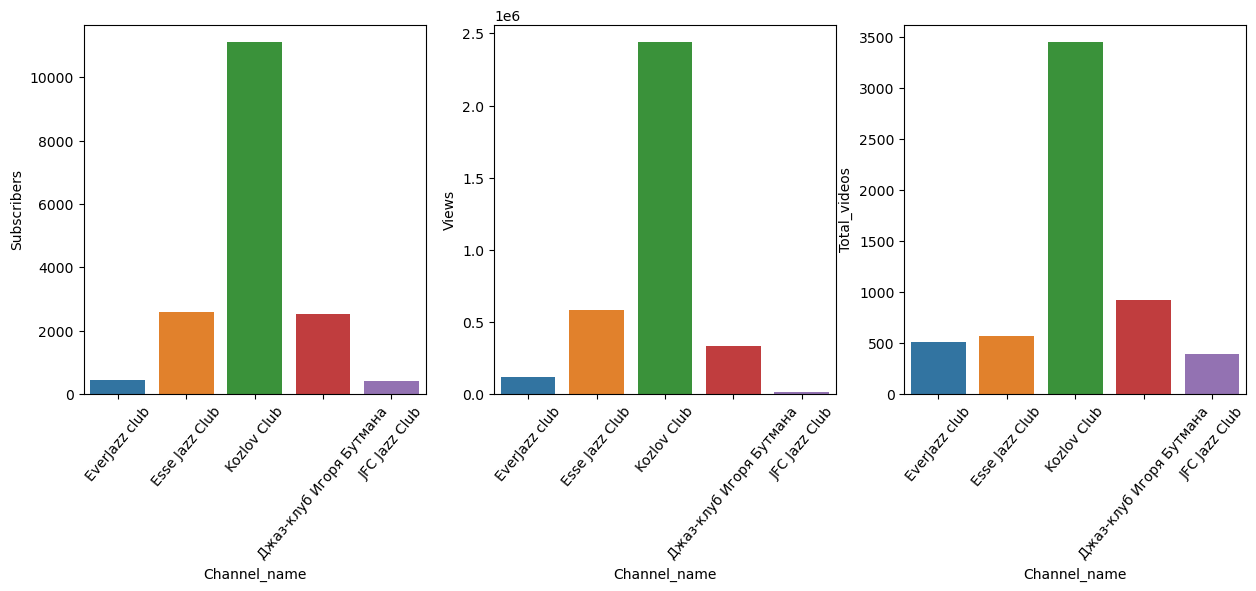

In [9]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(15)

for ax in axs:
    ax.tick_params(axis='x', rotation=50)
sns.barplot(x='Channel_name', y='Subscribers', data=channel_data, ax=axs[0])
sns.barplot(x='Channel_name', y='Views', data=channel_data, ax=axs[1])
sns.barplot(x='Channel_name', y='Total_videos', data=channel_data, ax=axs[2])

## Get uploaded videos ids in Kozlov Club

In [10]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Kozlov Club', 'playlist_id'].iloc[0]

In [11]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None or len(video_ids)>250: #to spare quota
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [12]:
video_ids = get_video_ids(youtube, playlist_id)
print(len(video_ids))
video_ids

300


['M9C3nT2weog',
 'bh_EYY6QXSk',
 'bfE4eR4dMUs',
 'AODWgAJqLrU',
 'sqK9BDflVQc',
 'nsFt5rpmy8Y',
 'pFTf23hvMLw',
 '-vHOSlf_rpg',
 'gzkzK2nNxmY',
 'MxiA0LM855g',
 'MrNyidHbPJY',
 'y2RZjEHVBr4',
 'C6wd8OOnAjA',
 'BFKYxVXQp1U',
 'cTE4mVGAPMI',
 'KyDI7ktEEKw',
 'GSaz9AxT2_A',
 '4Du5Jp5WuTc',
 'Mn_NJ8KrbC0',
 'NNd6nSsI1EM',
 'Bl1Ir0zg_Ac',
 'O-DTSUmUHBg',
 'ehXaPbKqmzQ',
 'myDsVuh80gk',
 '8YgxMQa90_o',
 'U0Vi8FNYNjQ',
 'nVQ3qVlA2so',
 'Jfu7wD106Eo',
 'VkhFNvlHS1g',
 '8de9Y5QLWaI',
 '07PQxUzftaE',
 'VhLITvuIfuk',
 '_ag_C00rTRE',
 'Fw8PWzKNnzA',
 'pGfUOIWWcSw',
 'DFZtgVnMpCk',
 'PaNtDD4fFBI',
 'Zs0VeuDWE2M',
 '5MDMrBBFSNc',
 'qE5vBU68DSY',
 'mjpxgtiTyIw',
 'k1D9bmW9vRg',
 'e8Zm7Rdi_6g',
 'SPzfvvhT8Ug',
 'WjLl_N23Wqc',
 'LogG6cNAANU',
 'p-FkeARozJQ',
 '7T2yEHcGk1I',
 'LtFHdkS9vYY',
 'Sc-uX89GnTE',
 'ptrB_kIrN_A',
 'PXoRi-tDuC4',
 'Fmoj92vHogw',
 'zyMDouvobdk',
 'reRtp1OGqbo',
 'csWVLKwoFIg',
 '5WYXwRNjsIU',
 '2hFJCdfPWs0',
 'xyOrbFYFTR4',
 '24x7THL6fcE',
 '5KLShlqERnA',
 '9f4ut868I-E',
 'YN87yJ

## Get video details

In [13]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
#                                Description = video['snippet']['description'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

In [14]:
video_details = get_video_details(youtube, video_ids)
video_data = pd.DataFrame(video_details)

In [15]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data

,Title,Published_date,Views,Likes,Comments
0,ДМИТРИЙ ЯКОВЛЕВ & JAZZ QUINTET IN TIME,2023-06-27,198,19,1
1,MARIMBA PLUS,2023-06-26,107,9,0
2,MARIMBA PLUS,2023-06-26,198,20,0
3,ФЕСТИВАЛЬ ИВАНА СМИРНОВА: ГИТАРНЫЙ КОНКУРС «ВС...,2023-06-26,405,22,0
4,SOME GIRLS: ROLLING STONES TRIBUTE,2023-06-25,245,9,1
...,...,...,...,...,...
295,MARIMBA PLUS,2022-09-23,602,24,3
296,АННА КОРОЛЁВА & OCEAN INSIDE TRIO: ДВОЙНОЙ КОН...,2022-09-21,454,23,2
297,ДИАЛОГИ С ГИТАРОЙ: МУКУЧ СУДЖЯН И ПАВЕЛ ЕРШОВ,2022-09-20,400,19,0
298,100 лет российскому джазу: Дмитрий Илугдин,2022-09-20,964,50,0


### Compare number of videos uploaded by month

In [16]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,ДМИТРИЙ ЯКОВЛЕВ & JAZZ QUINTET IN TIME,2023-06-27,198,19,1,Jun
1,MARIMBA PLUS,2023-06-26,107,9,0,Jun
2,MARIMBA PLUS,2023-06-26,198,20,0,Jun
3,ФЕСТИВАЛЬ ИВАНА СМИРНОВА: ГИТАРНЫЙ КОНКУРС «ВС...,2023-06-26,405,22,0,Jun
4,SOME GIRLS: ROLLING STONES TRIBUTE,2023-06-25,245,9,1,Jun
...,...,...,...,...,...,...
295,MARIMBA PLUS,2022-09-23,602,24,3,Sep
296,АННА КОРОЛЁВА & OCEAN INSIDE TRIO: ДВОЙНОЙ КОН...,2022-09-21,454,23,2,Sep
297,ДИАЛОГИ С ГИТАРОЙ: МУКУЧ СУДЖЯН И ПАВЕЛ ЕРШОВ,2022-09-20,400,19,0,Sep
298,100 лет российскому джазу: Дмитрий Илугдин,2022-09-20,964,50,0,Sep


In [17]:
videos_per_month = video_data.groupby('Month', as_index=False).size()
videos_per_month

,Month,size
0,Apr,32
1,Dec,34
2,Feb,29
3,Jan,31
4,Jun,26
5,Mar,36
6,May,37
7,Nov,32
8,Oct,32
9,Sep,11


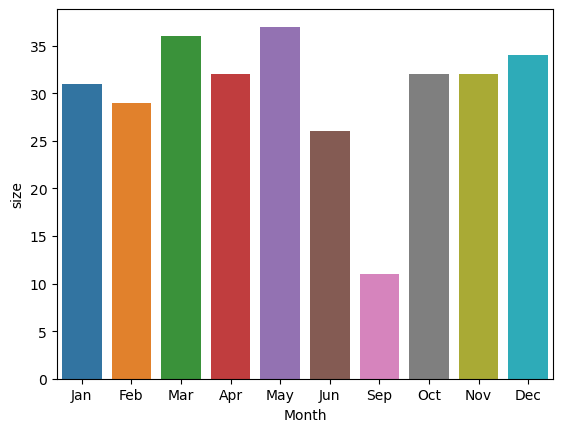

In [18]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)
videos_per_month = videos_per_month.sort_index()
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

## My own jazz playlist analysis

In [19]:
playlist_id = 'PLOCars_sF5AGEbKVTWtwSoAwlXl2r1MQ-'

def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               Views = video['statistics']['viewCount']
                               )
            all_video_stats.append(video_stats)
    
    return all_video_stats

video_ids = get_video_ids(youtube, playlist_id)
print(len(video_ids))
video_ids

43


['4rrXR6n0RTY',
 '2g6MsY8vD1A',
 'op7QhAIFl6I',
 'oE56g61mW44',
 '5kcmui5Eh6k',
 'oGTVoX7AaRc',
 'TRaRzTt5U1o',
 'x7LmhOEnIs4',
 'NGv366y_UjQ',
 '5NpLXwYZMOk',
 'lL5K9NDi8i8',
 '2YHgD0NFXtk',
 'mFD85j9nvZY',
 'fgvfNWZFxhk',
 '3UEBtBgS1YI',
 'Hg8xvt2ZA8o',
 'GpJAESVkbD4',
 'flE_HPemPdk',
 '8rF2pJWGWHM',
 'DdPU_edXaFU',
 '0IagRZBvLtw',
 'UlFNy9iWrpE',
 'AuEv942wOZs',
 'gyds04mi_Z0',
 'ukeAAvoKyzM',
 'pJYbc3RtnFo',
 'r3ZY0hFxuCA',
 'cIm2wWT7s2k',
 'k94zDsJ-JMU',
 'mMh5yrPznrY',
 'r2OD399-puY',
 '9kWNcPFhB9A',
 'DIKKsmLrGPo',
 'GXWXhXoFBWY',
 'X4Q7d0CtYyk',
 'xqy7oBVx9io',
 'X4gel6M0BLI',
 'bjycmg2aPdk',
 'bkGQNg3APZU',
 '3AK0Cn_Nc6Q',
 '9R4O2SkZ3GY',
 'Io5yOlI9gDs',
 'W1qovy7Spkk']

In [20]:
video_details = get_video_details(youtube, video_ids)
video_data = pd.DataFrame(video_details)

In [21]:
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Description,Views
0,The Aristocats - Everybody wants to be a cat,I do not own this movie.\nAll rights reserved ...,15547712
1,Robert Glasper - The Worst (Live At Capitol St...,Music video by Robert Glasper performing The W...,3906817
2,Lars Danielsson - Passacaglia,Lars Danielsson\nLiberetto II (2014)\nA 02 Pas...,79291
3,Isn't She Lovely,Provided to YouTube by Universal Music Group\n...,47827665
4,Martin Miller & Tom Quayle - Isn't She Lovely ...,Pre-order the Ibanez MM1 here: \nhttps://www.g...,3904037
5,Robert Glasper Experiment: NPR Music Tiny Desk...,"The third song in this Tiny Desk Concert, expl...",2363733
6,Gal Costa - Wave,Music video by Gal Costa performing Wave. (C) ...,1869131
7,GoGo Penguin - Jazz à la Villette,PLEASE SUPPORT THE ARTISTS : https://gogopengu...,1040295
8,Chris Dave And The Drumhedz: NPR Music Tiny De...,Watch Chris Dave And The Drumhedz play at the ...,863232
9,"K Custom Special Dry Performance - Lenny ""The ...",Lenny “The Ox” Reece and The Lesson GK is the ...,287712


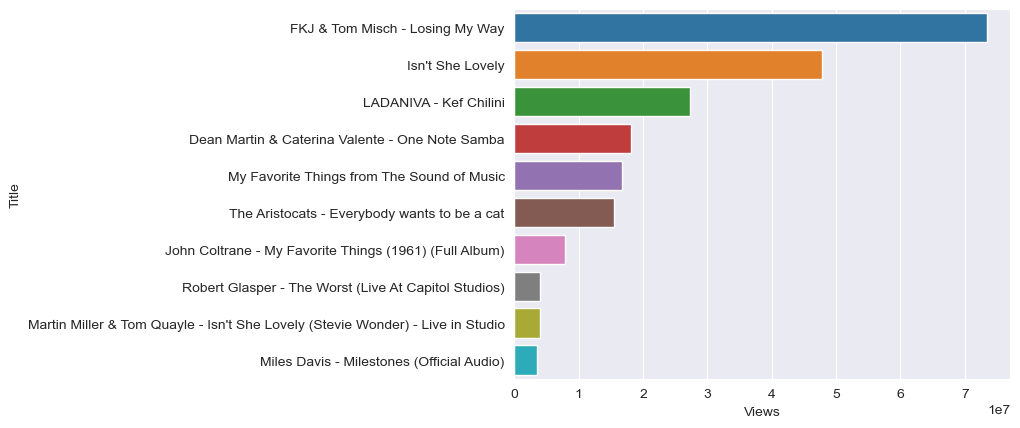

In [22]:
sns.set_style("darkgrid")
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [23]:
top10_videos

,Title,Description,Views
34,FKJ & Tom Misch - Losing My Way,FKJ x Tom Misch - Losing My Way \n\nFilmed by ...,73415578
3,Isn't She Lovely,Provided to YouTube by Universal Music Group\n...,47827665
33,LADANIVA - Kef Chilini,LADANIVA - Kef Chilini\n\nMusic and lyrics: LA...,27364392
22,Dean Martin & Caterina Valente - One Note Samba,,18142235
20,My Favorite Things from The Sound of Music,"""My Favorite Things"" from the 1965 film of THE...",16647395
0,The Aristocats - Everybody wants to be a cat,I do not own this movie.\nAll rights reserved ...,15547712
21,John Coltrane - My Favorite Things (1961) (Ful...,Bass – Steve Davis\nDrums – Elvin Jones\nPiano...,7794662
1,Robert Glasper - The Worst (Live At Capitol St...,Music video by Robert Glasper performing The W...,3906817
4,Martin Miller & Tom Quayle - Isn't She Lovely ...,Pre-order the Ibanez MM1 here: \nhttps://www.g...,3904037
28,Miles Davis - Milestones (Official Audio),”Milestones” by Miles Davis\nListen to Miles D...,3439494


In [24]:
video_data.to_csv('jazz_playlist_stats.csv')

## WordCloud 

In [25]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [26]:
video_data = pd.read_csv('jazz_playlist_stats.csv', index_col=0)

In [27]:
descriptions = " ".join(description for description in video_data.Description if type(description) is str)
titles = " ".join(title for title in video_data.Title)
text = " ".join([titles, descriptions])
print ("There are {} words in the combination of all descriptions.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "в", "и", "instagram", "music", "facebook", "twitter", "musical", "film", "youtube"])

There are 29719 words in the combination of all descriptions.


In [28]:
sax_mask = np.array(Image.open("saxophone.png"))
sax_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

(-0.5, 499.5, 499.5, -0.5)

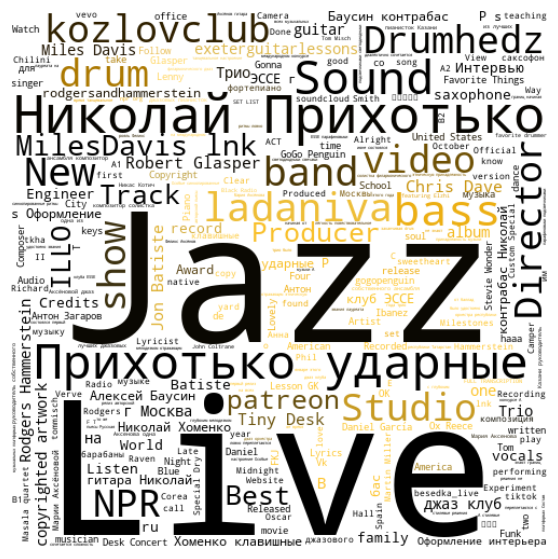

In [29]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=sax_mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(sax_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")